# Importing Libraries and Loading data


In [89]:
#importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
from PIL import  Image


from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')



In [90]:
#importing various libraries for visualization

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [91]:
#loading the csv files for analysis 
gb= pd.read_csv('GBvideos.csv')
us= pd.read_csv('USvideos.csv')
ind= pd.read_csv('INvideos.csv')
fra= pd.read_csv('FRvideos.csv')

In [92]:
#checking the datatypes of each column in the table
fra.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [93]:
ind.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [94]:
us.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [95]:
gb.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [96]:
us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Cleaning and Manipulating data 

In [97]:
#cheaking for the null values 
gb.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

In [98]:
#dropping columns which are not required
gb.drop(['description','thumbnail_link',
         'comments_disabled','ratings_disabled',
         'video_error_or_removed','tags'], 
          axis=1,inplace= True)

us.drop(['description','thumbnail_link',
         'comments_disabled','ratings_disabled',
         'video_error_or_removed','tags'], 
          axis=1,inplace= True)
ind.drop(['description','thumbnail_link',
         'comments_disabled','ratings_disabled',
         'video_error_or_removed','tags'], 
          axis=1,inplace= True)
fra.drop(['description','thumbnail_link',
         'comments_disabled','ratings_disabled',
         'video_error_or_removed','tags'], 
          axis=1,inplace= True)

In [99]:
#checking how the table looks after the dropped columns
gb.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,7224515,55681,10247,9479
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,1053632,25561,2294,2757
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,17158579,787420,43420,125882
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,27833,193,12,37
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,9815,30,2,30


In [100]:
# converting trending date column to the correct format 
us['trending_date'] = pd.to_datetime(us['trending_date'], format='%y.%d.%m').dt.date

In [101]:

publish_time = pd.to_datetime(us['publish_time'], format= '%Y-%m-%dT%H:%M:%S.%fZ')
us['publish_date'] = publish_time.dt.date
us['publish_time'] = publish_time.dt.time
us['publish_hour'] = publish_time.dt.hour
us.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,748374,57527,2966,15954,2017-11-13,17


# Data Visualization 

In [102]:
# creating a graph comparing the highest number of likes in each country 
newtable=[['Great Britain',424538912],['United States',225211923],['India',125432237],['France',100911567]]
df = pd.DataFrame(newtable, columns = ['Country', 'No.of Likes']) 
df

,Country,No.of Likes
0,Great Britain,424538912
1,United States,225211923
2,India,125432237
3,France,100911567


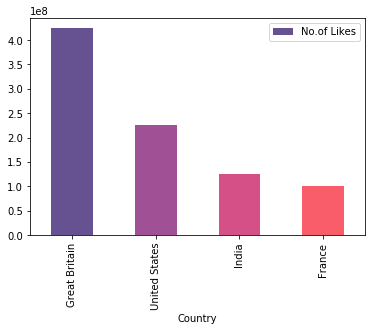

In [103]:
visual1=df.plot(kind='bar', x='Country',  y='No.of Likes',color=['#665191','#a05195','#d45087','#f95d6a'])

In [104]:
#displaying the the top 50 songs 
largestGB=gb.nlargest(50,['likes']).head(50)
largestGB

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
36638,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,123010920,5613827,206892,1228655
36468,7C2z4GqqS5E,18.31.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,121219886,5595203,205565,1225326
36288,7C2z4GqqS5E,18.30.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,115664850,5530568,200995,1213172
36119,7C2z4GqqS5E,18.29.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,111882133,5486349,197638,1204867
38401,VYOjWnS4cMY,18.11.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,259721696,5444541,379862,553371
35948,7C2z4GqqS5E,18.28.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,107756615,5439015,194172,1197130
38235,VYOjWnS4cMY,18.10.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,258282383,5426274,378503,551747
35775,7C2z4GqqS5E,18.27.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,103786733,5386959,190567,1189456
38056,VYOjWnS4cMY,18.09.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,253164724,5366150,373226,546804
37879,VYOjWnS4cMY,18.08.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,249906820,5329161,370243,544059


In [105]:
#grouping the similar title songs into one and sorting in descending order
ct1=largestGB.groupby(['title']).sum()
ct1.sort_values(['likes'],axis=0, 
                 ascending=True, inplace=True)
ct1

,category_id,views,likes,dislikes,comment_count
title,,,,,
Drake - God’s Plan,130,2751804771,56914072,1310913,3637094
BTS (방탄소년단) 'FAKE LOVE' Official MV,130,1243838364,67954988,2317070,14876247
Childish Gambino - This Is America (Official Video),240,5053464922,115924506,7822852,12012378


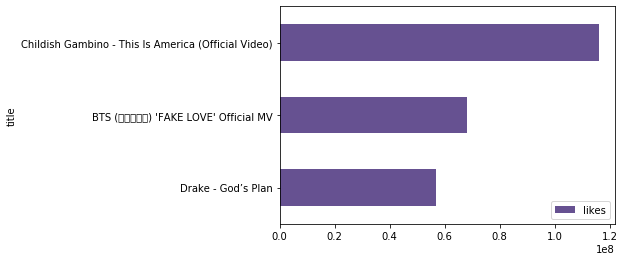

In [106]:
#Plotting the graph 
ct1.plot(kind='barh',y='likes',color='#665191')

In [107]:
largestUS=us.nlargest(40,['likes']).head(40)
largestUS

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_hour
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,123010920,5613827,206892,1228655,2018-05-18,9
38072,7C2z4GqqS5E,2018-05-31,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,121219886,5595203,205565,1225326,2018-05-18,9
37861,7C2z4GqqS5E,2018-05-30,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,115664850,5530568,200995,1213172,2018-05-18,9
37655,7C2z4GqqS5E,2018-05-29,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,111882133,5486349,197638,1204867,2018-05-18,9
37453,7C2z4GqqS5E,2018-05-28,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,107756615,5439015,194172,1197130,2018-05-18,9
37247,7C2z4GqqS5E,2018-05-27,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,103786733,5386959,190567,1189456,2018-05-18,9
37031,7C2z4GqqS5E,2018-05-26,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,98637739,5321402,186331,1165350,2018-05-18,9
36816,7C2z4GqqS5E,2018-05-25,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,92054928,5232318,179451,1163977,2018-05-18,9
36611,7C2z4GqqS5E,2018-05-24,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,87430865,5150831,172570,1142269,2018-05-18,9
36397,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,09:00:02,80738011,5053329,165853,1114809,2018-05-18,9


In [108]:
ct2=largestUS.groupby(['title']).sum()

ct2.sort_values(['likes'], axis=0, 
                 ascending=True, inplace=True) 
ct2


,category_id,views,likes,dislikes,comment_count,publish_hour
title,,,,,,
Ariana Grande - No Tears Left To Cry,30,389006519,8935380,366206,707464,12
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,72,412651484,9020717,4790457,2435838,51
BTS (방탄소년단) 'FAKE LOVE' Official MV,140,1283188291,71835050,2389776,15568561,126
Childish Gambino - This Is America (Official Video),200,3460370119,86055326,5553792,9020605,80


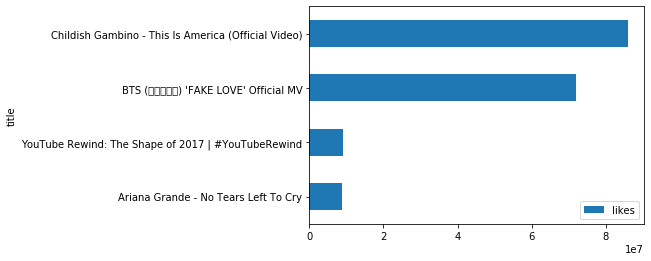

In [109]:
ct2.plot(kind='barh',y='likes')

In [110]:
largestIND=ind.nlargest(5,['likes']).head(5)
largestIND

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
5408,FlsCjmMhFmw,17.12.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,125432237,2912710,1545017,807558
5119,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,113876217,2811216,1470387,787174
4936,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,100911567,2656672,1353650,682890
4477,6ZfuNTqbHE8,17.07.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,89930713,2606663,53011,347982
4236,6ZfuNTqbHE8,17.06.12,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,87449453,2584674,52176,341571


In [111]:
ct3=largestIND.groupby(['title']).sum()
ct3.sort_values(['likes'], axis=0, 
                 ascending=True, inplace=True) 
ct3

,category_id,views,likes,dislikes,comment_count
title,,,,,
Marvel Studios' Avengers: Infinity War Official Trailer,48,177380166,5191337,105187,689553
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,72,340220021,8380598,4369054,2277622


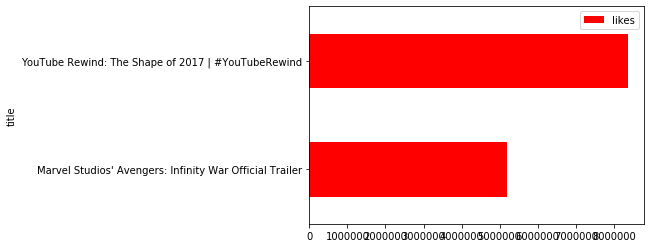

In [112]:
ct3.plot(kind='barh',y='likes',color='r')

In [113]:
largestFRA= fra.nlargest(5,['likes']).head(5)
largestFRA

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
35902,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,65396157,4750254,141966,1040912
35626,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,62796390,4470923,119052,905925
35431,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,39349927,3880074,72707,692311
5342,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,100911567,2656682,1353661,682890
21526,OK3GJ0WIQ8s,18.03.03,j-hope 'Daydream (백일몽)' MV,ibighit,10,2018-03-01T15:00:02.000Z,15777624,2392595,21872,437036


In [114]:
ct4=largestFRA.groupby(['title']).sum()
ct4.sort_values(['likes'], axis=0, ascending=True, inplace=True) 
ct4

,category_id,views,likes,dislikes,comment_count
title,,,,,
j-hope 'Daydream (백일몽)' MV,10,15777624,2392595,21872,437036
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,24,100911567,2656682,1353661,682890
BTS (방탄소년단) 'FAKE LOVE' Official MV,30,167542474,13101251,333725,2639148


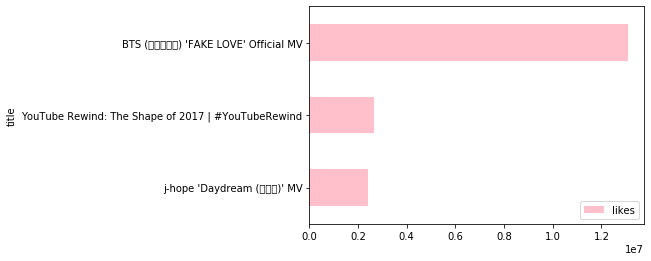

In [115]:
ct4.plot(kind='barh',y='likes',color='pink')

In [116]:
#checking the correlation of each column with each other for youtube videos in great britain
correlation_columns = ['views', 'likes', 'dislikes', 'comment_count']
corrematrix = us[correlation_columns].corr()
corrematrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


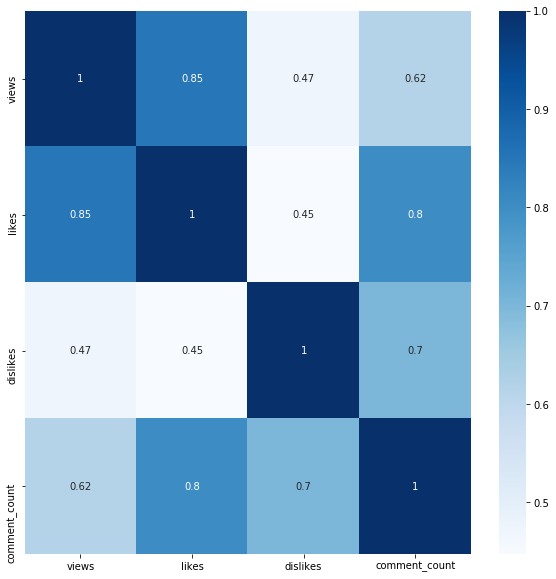

In [117]:
#Plotting the correlation as a heatmap
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(corrematrix, cmap= 'Blues',annot=True)


In [118]:
#changing the datatype of category_id in each file
type_str_list = ['category_id']
for column in type_str_list:
    gb[column] = gb[column].astype(str)

In [119]:
type_str_list = ['category_id']
for column in type_str_list:
    fra[column] = fra[column].astype(str)

In [120]:
type_str_list = ['category_id']
for column in type_str_list:
    ind[column] = ind[column].astype(str)

In [121]:
type_str_list = ['category_id']
for column in type_str_list:
    us[column] = us[column].astype(str)

In [122]:
# mapping the catorgy id with the category name in each file
cat_to_id = {}

with open('US_category_id.json', 'r') as a:
    data = json.load(a)
    for category in data['items']:
        cat_to_id[category['id']] = category['snippet']['title']
        
        cat_to_id


In [123]:
cat_to_id1 = {}

with open('IN_category_id.json', 'r') as b:
    data = json.load(b)
    for category in data['items']:
        cat_to_id1[category['id']] = category['snippet']['title']
        
        cat_to_id1


In [124]:
cat_to_id2 = {}

with open('FR_category_id.json', 'r') as c:
    data = json.load(c)
    for category in data['items']:
        cat_to_id2[category['id']] = category['snippet']['title']
        
        cat_to_id2

In [125]:
cat_to_id3 = {}

with open('GB_category_id.json', 'r') as d:
    data = json.load(d)
    for category in data['items']:
        cat_to_id3[category['id']] = category['snippet']['title']
        
        cat_to_id3

In [126]:
#inserting the category into the table
us.insert(4, 'category', us['category_id'].map(cat_to_id))
us[['category_id', 'category']].head()

,category_id,category
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [127]:
ind.insert(4, 'category', ind['category_id'].map(cat_to_id1))
ind[['category_id', 'category']].head()

,category_id,category
0,1,Film & Animation
1,25,News & Politics
2,24,Entertainment
3,23,Comedy
4,24,Entertainment


In [128]:
fra.insert(4, 'category', fra['category_id'].map(cat_to_id2))
fra[['category_id', 'category']].head()

,category_id,category
0,24,Entertainment
1,24,Entertainment
2,23,Comedy
3,20,Gaming
4,17,Sports


In [129]:
gb.insert(4, 'category', gb['category_id'].map(cat_to_id3))
gb[['category_id', 'category']].head()

,category_id,category
0,26,Howto & Style
1,24,Entertainment
2,10,Music
3,17,Sports
4,25,News & Politics


In [130]:
# grouping the similar category videos together , taking the count and arranging in ascending order
t1=us.groupby(['category']).count()
t1.sort_values( ['category_id'],axis=0, 
                 ascending=True, inplace=True) 


t1

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,publish_date,publish_hour
category,,,,,,,,,,,,
Nonprofits & Activism,57,57,57,57,57,57,57,57,57,57,57,57
Shows,57,57,57,57,57,57,57,57,57,57,57,57
Autos & Vehicles,384,384,384,384,384,384,384,384,384,384,384,384
Travel & Events,402,402,402,402,402,402,402,402,402,402,402,402
Gaming,817,817,817,817,817,817,817,817,817,817,817,817
Pets & Animals,920,920,920,920,920,920,920,920,920,920,920,920
Education,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656,1656
Sports,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174
Film & Animation,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345,2345


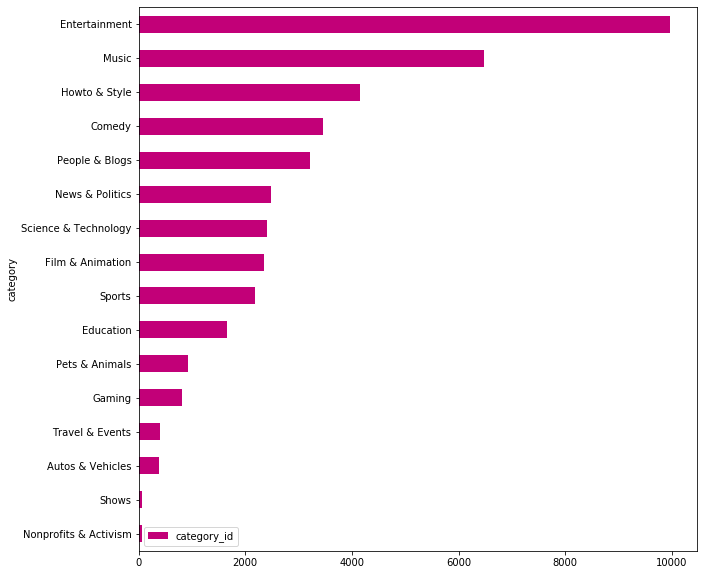

In [131]:
# Plotting a horizontal bar graph for the most popular category in US
t1.plot(kind='barh',y='category_id',color='xkcd:magenta')


In [132]:
# Here we are trying to see the largest content creators in the US
max_title_length = 30
number_of_creators = 100

top_creators = us.groupby(['channel_title'])['channel_title'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False
).head(number_of_creators).reset_index()

In [133]:
caddd = top_creators.head()
caddd

,channel_title,code_count
0,ESPN,203
1,The Tonight Show Starring Jimmy Fallon,197
2,Vox,193
3,Netflix,193
4,TheEllenShow,193


[Text(0, 0, 'ESPN'),
 Text(0, 0, 'The Tonight Show Starring Jimmy Fallon'),
 Text(0, 0, 'Vox'),
 Text(0, 0, 'Netflix'),
 Text(0, 0, 'TheEllenShow')]

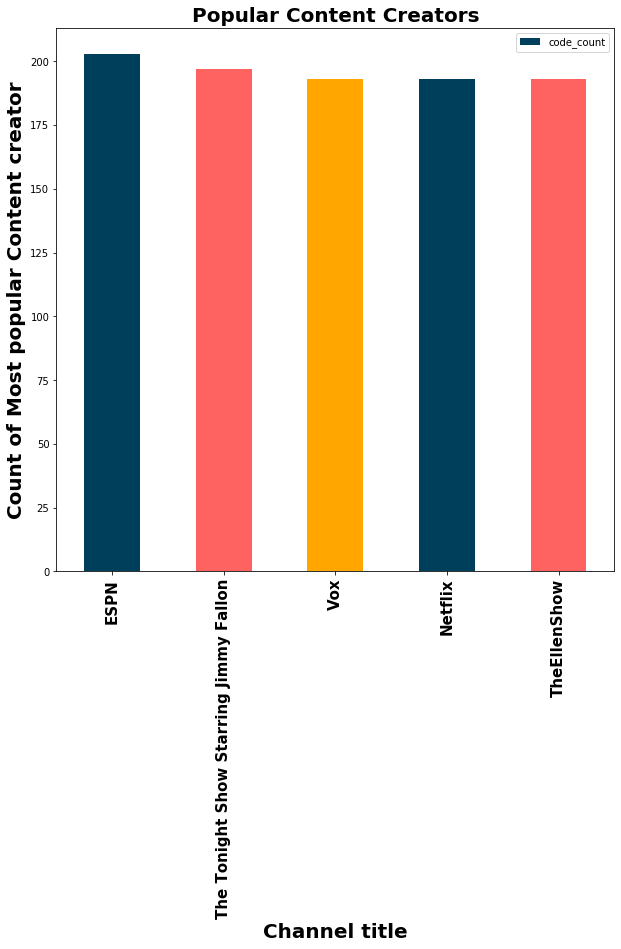

In [134]:

#labels = top_creators['channel_title']
# plt.xlabel('Channel Title ',fontsize=15)
# plt.ylabel('Count of the videos Published',fontsize=15)
#v1z=caddd.plot.pie(y='code_count', labels=labels, startangle=90, autopct='%0f')

visz1=caddd.plot(kind='bar',color=('#003f5c','#ff6361','#ffa600'),x='channel_title')
visz1.set_xlabel('Channel title',fontsize=20,weight='bold')
visz1.set_ylabel('Count of Most popular Content creator',fontsize=20,weight='bold')
visz1.set_title('Popular Content Creators',fontsize=20,weight='bold')
visz1.set_xticklabels(visz1.get_xticklabels(), rotation=90,fontsize=15,weight='bold')


# Consolidating the all the files into a single Dataframe

In [135]:
#putting the files into one using the concat function
frames=[gb,us,ind,fra]
result=pd.concat(frames)
result

,category,category_id,channel_title,comment_count,dislikes,likes,publish_date,publish_hour,publish_time,title,trending_date,video_id,views
0,Howto & Style,26,John Lewis,9479,10247,55681,NaN,NaN,2017-11-10T07:38:29.000Z,John Lewis Christmas Ad 2017 - #MozTheMonster,17.14.11,Jw1Y-zhQURU,7224515
1,Entertainment,24,Saturday Night Live,2757,2294,25561,NaN,NaN,2017-11-12T06:24:44.000Z,Taylor Swift: …Ready for It? (Live) - SNL,17.14.11,3s1rvMFUweQ,1053632
2,Music,10,EminemVEVO,125882,43420,787420,NaN,NaN,2017-11-10T17:00:03.000Z,Eminem - Walk On Water (Audio) ft. Beyoncé,17.14.11,n1WpP7iowLc,17158579
3,Sports,17,Salford City Football Club,37,12,193,NaN,NaN,2017-11-13T02:30:38.000Z,Goals from Salford City vs Class of 92 and Fri...,17.14.11,PUTEiSjKwJU,27833
4,News & Politics,25,Cute Girl Videos,30,2,30,NaN,NaN,2017-11-13T01:45:13.000Z,Dashcam captures truck's near miss with child ...,17.14.11,rHwDegptbI4,9815
5,Entertainment,24,PointlessBlogVlogs,2333,1431,52708,NaN,NaN,2017-11-11T17:00:00.000Z,How My Relationship Started!,17.14.11,AumaWl0TNBo,1182775
6,Music,10,Ed Sheeran,85067,21082,1634124,NaN,NaN,2017-11-09T11:04:14.000Z,Ed Sheeran - Perfect (Official Music Video),17.14.11,2Vv-BfVoq4g,33523622
7,People & Blogs,22,MoreZoella,624,749,57309,NaN,NaN,2017-11-10T19:19:43.000Z,CHRISTMAS HAS GONE TO MY HEAD,17.14.11,-N5eucPMTTc,1164201
8,Music,10,ElbowVEVO,211,147,2163,NaN,NaN,2017-11-10T08:00:01.000Z,Elbow - Golden Slumbers (John Lewis Advert 2017),17.14.11,LMCuKltaY3M,154494
9,Music,10,JenniferLopezVEVO,11473,15015,190084,NaN,NaN,2017-11-10T15:00:00.000Z,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",17.14.11,9t9u_yPEidY,9548677


In [136]:
#Converting the date and time into correct format and putting it in separate columns 

In [137]:
#publish_time1 = pd.to_datetime(result['publish_time'], format= '%Y-%m-%dT%H:%M:%S.%fZ')
#result['publish_date'] = publish_time1.dt.date
#result['publish_time'] = publish_time1.dt.time
#result['publish_hour'] = publish_time1.dt.hour
#result.head(1)

result['trending_date'] = pd.to_datetime(result['trending_date'],
                                         errors='coerce', 
                                         format='%y.%d.%m')
result['publish_time'] = pd.to_datetime(result['publish_time'],
                                        errors='coerce',
                                        format='%Y-%m-%dT%H:%M:%S.%fZ')

result = result[result['trending_date'].notnull()]
result = result[result['publish_time'].notnull()]

#result = result.dropna(how='any',inplace=False, axis = 0)

result.insert(4, 'publish_date1',
              result['publish_time'].dt.date)
result['publish_time'] = result['publish_time'].dt.time

#result_full = result.reset_index().sort_values('trending_date').set_index('video_id')
# result = result.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')


result[['publish_date1','publish_time']].head()

,publish_date1,publish_time
0,2017-11-10,07:38:29
1,2017-11-12,06:24:44
2,2017-11-10,17:00:03
3,2017-11-13,02:30:38
4,2017-11-13,01:45:13


In [138]:
# Displayig the top 200 songs around the 4 countries

largestresult=result.nlargest(200,['likes']).head(200)
largestresult


,category,category_id,channel_title,comment_count,publish_date1,dislikes,likes,publish_date,publish_hour,publish_time,title,trending_date,video_id,views
36638,Music,10,ibighit,1228655,2018-05-18,206892,5613827,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-06-01,7C2z4GqqS5E,123010920
36468,Music,10,ibighit,1225326,2018-05-18,205565,5595203,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-31,7C2z4GqqS5E,121219886
36288,Music,10,ibighit,1213172,2018-05-18,200995,5530568,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-30,7C2z4GqqS5E,115664850
36119,Music,10,ibighit,1204867,2018-05-18,197638,5486349,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-29,7C2z4GqqS5E,111882133
38401,Music,10,ChildishGambinoVEVO,553371,2018-05-06,379862,5444541,NaN,NaN,04:00:07,Childish Gambino - This Is America (Official V...,2018-06-11,VYOjWnS4cMY,259721696
35948,Music,10,ibighit,1197130,2018-05-18,194172,5439015,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-28,7C2z4GqqS5E,107756615
38235,Music,10,ChildishGambinoVEVO,551747,2018-05-06,378503,5426274,NaN,NaN,04:00:07,Childish Gambino - This Is America (Official V...,2018-06-10,VYOjWnS4cMY,258282383
35775,Music,10,ibighit,1189456,2018-05-18,190567,5386959,NaN,NaN,09:00:02,BTS (방탄소년단) 'FAKE LOVE' Official MV,2018-05-27,7C2z4GqqS5E,103786733
38056,Music,10,ChildishGambinoVEVO,546804,2018-05-06,373226,5366150,NaN,NaN,04:00:07,Childish Gambino - This Is America (Official V...,2018-06-09,VYOjWnS4cMY,253164724
37879,Music,10,ChildishGambinoVEVO,544059,2018-05-06,370243,5329161,NaN,NaN,04:00:07,Childish Gambino - This Is America (Official V...,2018-06-08,VYOjWnS4cMY,249906820


In [139]:
# grouping the videos withcommon title togther and sorting the values in ascending order
result1=largestresult.groupby(['title']).sum()
result1.sort_values(['likes'], axis=0, 
                 ascending=False, inplace=True) 
#resetting the index 

r = result1.reset_index().set_index('comment_count')
r

,title,dislikes,likes,publish_hour,views
comment_count,,,,,
14519790,Childish Gambino - This Is America (Official V...,9172579,139696673,0.0,5874111947
7105096,Drake - God’s Plan,2280320,111147937,0.0,4505185212
5169264,Bad Bunny - Amorfoda | Video Oficial,4663142,90106976,0.0,6407945653
18207706,BTS (방탄소년단) 'FAKE LOVE' Official MV,2723502,84936313,0.0,1450730765
6406220,Ariana Grande - No Tears Left To Cry,3372780,81241980,0.0,3778518999
15182966,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,30476921,57763870,0.0,2691402011
5227723,Marvel Studios' Avengers: Infinity War Officia...,797062,39196310,0.0,1361479437
5461210,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,502740,27836860,0.0,412476496
658242,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,968229,18667076,0.0,2749725683


In [140]:
# Plotting a horizontal bar graph representing the highest likes 

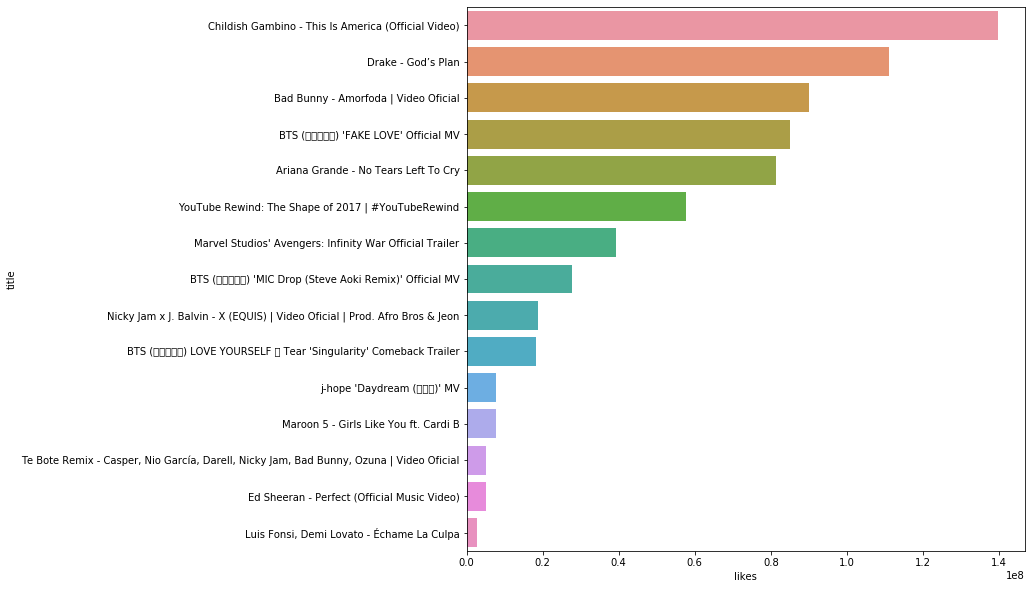

In [141]:


ax = sns.barplot(x='likes', y='title', data=r)

In [142]:
# Grouping the videos based on category and then sorting the values in ascending order
tt1=result.groupby(['category']).count()
tt1.sort_values( ['category_id'],axis=0, 
                 ascending=False, inplace=True) 
#resetting the index as comment count
fx=tt1.reset_index().set_index('comment_count')
fx

,category,category_id,channel_title,publish_date1,dislikes,likes,publish_date,publish_hour,publish_time,title,trending_date,video_id,views
comment_count,,,,,,,,,,,,,
35655,Entertainment,35655,35655,35655,35655,35655,0,0,35655,35655,35655,35655,35655
21558,Music,21558,21558,21558,21558,21558,0,0,21558,21558,21558,21558,21558
11269,People & Blogs,11269,11269,11269,11269,11269,0,0,11269,11269,11269,11269,11269
10218,News & Politics,10218,10218,10218,10218,10218,0,0,10218,10218,10218,10218,10218
9600,Comedy,9600,9600,9600,9600,9600,0,0,9600,9600,9600,9600,9600
6980,Sports,6980,6980,6980,6980,6980,0,0,6980,6980,6980,6980,6980
6392,Film & Animation,6392,6392,6392,6392,6392,0,0,6392,6392,6392,6392,6392
5134,Howto & Style,5134,5134,5134,5134,5134,0,0,5134,5134,5134,5134,5134
3313,Gaming,3313,3313,3313,3313,3313,0,0,3313,3313,3313,3313,3313


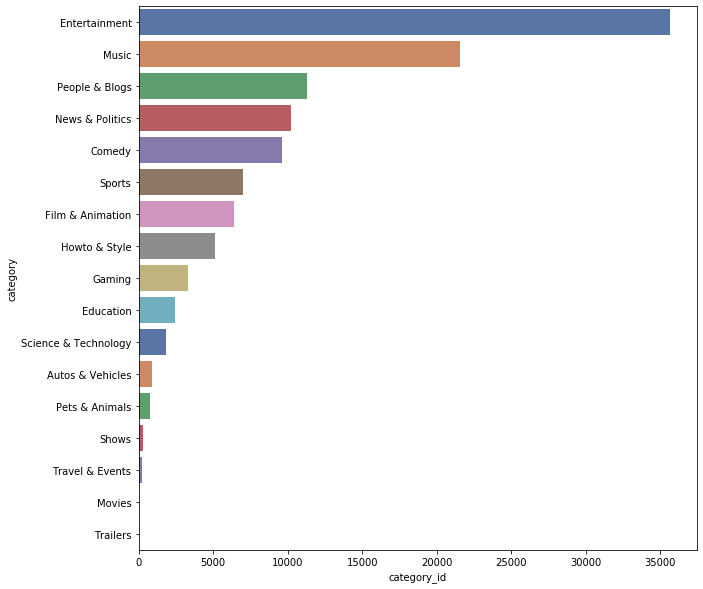

In [143]:
#plotting a horizontal bar garph to represent which category is the most popular 
px=sns.barplot(x='category_id',y='category',data=fx,palette="deep")

In [144]:
#Generating a world cloud of the most popular words in the table 

In [145]:
def createwordcloud(result , bgcolor , title):
    plt.figure(figsize = (13,14))
    wc = WordCloud(background_color = bgcolor, max_words = 1000, stopwords = STOPWORDS, max_font_size = 50)
    wc.generate(' '.join(result))
    plt.imshow(wc)
    plt.axis('off')

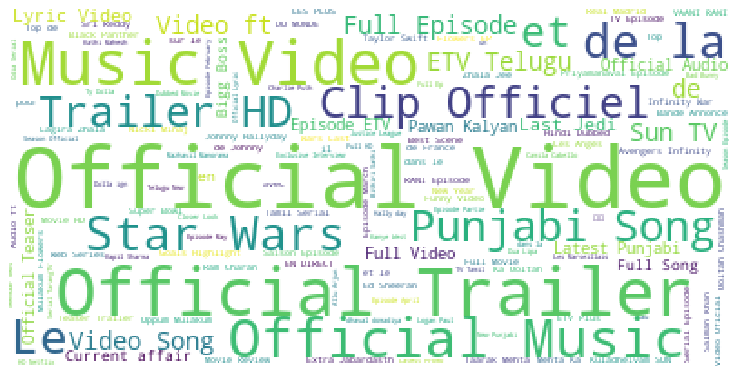

In [146]:
tags = result['title']
createwordcloud(tags , 'white' , 'title' )